## Delta Hedge Portfolio



In this work we will introduce the concept of a delta hedging portfolio and how we can make a profit by making a good prediction of realized and implied volatility.

A hedge portfolio could look like the following:

$\begin{equation} C - \Delta S_t \label{1} \end{equation} $ 

Over a single time step the change in the option is 

$ \begin{equation} \ C(S_{t+1}) - C(S_t) \label{2} \end{equation} $

The change in the hedge is 

$ \begin{equation}\label{3}\tag{3} - \Delta(S_{t+1}-S_t)\end{equation} $

And cost of finance the position (we bought
the option, so we need to ﬁnance that cost but we shorted stock so we
receive money) 

$ \begin{equation}\label{4}\tag{4}- r(C-\Delta S_t)\end{equation} $

So replacing 2, 3 and 4 in 1 we have

$ \begin{equation}\label{5}\tag{5} C(S_{t+1}) - C(S_t) - \Delta(S_{t+1}-S_t) - r(C-\Delta S_t)\end{equation} $ 

The change in the option value due to the underlying price change can
be approximated by a second order Taylor expansion. Also, since other things held constant, the price of the option will decrease with the simple passing of the time.

The change in C is

$\begin{equation}\label{6}\tag{6} \Delta(S_{t+1}-S_t) + \frac{1}{2} (S_{t+1}-S_t)^2 \frac{\partial^2C}{\partial S^2} + \theta \end{equation}$ 

Replacing (6) in (5)

$\begin{equation}\label{7}\tag{7} \Delta(S_{t+1}-S_t) + \frac{1}{2} (S_{t+1}-S_t)^2 \frac{\partial^2C}{\partial S^2} + \theta - \Delta(S_{t+1}-S_t) - r(C-\Delta S_t)\end{equation}$ 

The delta terms are cancel with each other

$\begin{equation}\label{8}\tag{8} \frac{1}{2} (S_{t+1}-S_t)^2 \frac{\partial^2C}{\partial S^2} + \theta - r(C-\Delta S_t) \end{equation}$

We raplace the second partial derivative term for $\Gamma$

$\begin{equation}\label{9}\tag{9} \frac{1}{2} (S_{t+1}-S_t)^2 \Gamma + \theta - r(C-\Delta S_t) \end{equation}$ 

Also in average we have that 

$\begin{equation}\label{10}\tag{10} (S_{t+1}-S_t)^2 \cong \sigma^2 S^2 \end{equation}$ 

Again, replacing in 9 now

$\begin{equation}\label{11}\tag{11} \frac{1}{2} \sigma^2 S^2 \Gamma + \theta - r(C-\Delta S_t) \end{equation}$

Finally, as the position is riskless and we could not have abnormals returns, the fair value of the portfolio is 0.

$\begin{equation}\label{12}\tag{12} \frac{1}{2} \sigma^2 S^2 \Gamma + \theta - r(C-\Delta S_t) = 0\end{equation} $

So above we have the famous Black-Scholes-Merton differential equation.

If we assume r = 0, there is an interesting relationship between theta and Gamma.

$\begin{equation}\label{13}\tag{13} -\frac{1}{2} \sigma^2 S^2 \Gamma = \theta \end{equation}$

Our PnL will be dertermined by 

$\begin{equation}\label{14}\tag{14} PnL = Gamma \  PnL + theta \ PnL + other \ minor \ effects\end{equation} $ 

$\begin{equation}\label{15}\tag{15} Gamma PnL = \frac{1}{2} \Delta S^2 \Gamma\end{equation}$ 

$\begin{equation}\label{16}\tag{16} theta PnL = \theta \Delta t \end{equation}$ 

Ignoring other effects 

$\begin{equation}\label{17}\tag{17} PnL = \frac{1}{2} \Delta S^2 \Gamma + \theta \Delta t\end{equation} $ 

Replacing 13 in 17 and doing the math 

$\begin{equation}\label{18} \tag{18} PnL = \frac{1}{2} \Gamma S^2 [(\frac{\Delta S}{S})^2 -  \sigma_{implied}(\Delta t)] \end{equation} $

From the above equation we could easily see that if the realized volatility is bigger than the implied volatility of the option we could generate a profit in the case we are long in the call and delta short in the stock. This will be the basis for the present work.

In [1]:
#
# First, we import all the necessary packages
#
import pandas as pd
import numpy as np
from math import log, sqrt, exp
from scipy import stats
import matplotlib.pyplot as plt

### Black-Sholes pricing formula
Black-Sholes Forumla for European call Options on an underlying without dividends.

 
$\begin{equation}\label{19}\tag{19}C(S_0,K,T,r,\sigma)=S_0N(d_1)-e^{-rT}KN(d_2)\end{equation}$
 
 
$\begin{equation}\label{19.1}\tag{19.1}N(d)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^d \mathrm{e}^{-\frac{1}{2}x^2}\mathrm{d}x\end{equation}$

$\begin{equation}\label{19.2}\tag{19.2}d_1=\frac{\log{\frac{S_0}{K}}+(r+\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}\end{equation}$
 
$\begin{equation}\label{19.3}\tag{19.3}d_1=\frac{\log{\frac{S_0}{K}}+(r-\frac{\sigma^2}{2})T}{\sigma\sqrt{T}}\end{equation}$

                        Delta:  

$\begin{equation}\label{20}\tag{20}\frac{\partial C}{\partial\S}=N(d1)\end{equation}$

                        Gamma:

$\begin{equation}\label{21}\tag{21} \frac{\partial^2C}{\partial S^2}=\frac{n(d1)}{S\sigma\sqrt{t}}\end{equation}$

                        theta:

$\begin{equation}\label{22}\tag{22} -\frac{\partial C}{\partial t}= -\frac{S \sigma n(d1)}{2\sqrt{t}} \end{equation}$
        
                        Vega:

$\begin{equation}\label{23}\tag{23}\frac{\partial C}{\partial\sigma}=S_0N(d_1)\sqrt{T}\end{equation}$

In [2]:
#
# Define the bsm pricing formula
#
def bsm(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    delta = stats.norm.cdf(d1, 0.0, 1.0)
    gamma= stats.norm.pdf(d1, 0.0, 1.0)/(S0*sigma*np.sqrt(T))
    vega=S0*stats.norm.pdf(d1, 0.0, 1.0)*np.sqrt(T)
    theta=-.5*S0*stats.norm.pdf(d1, 0.0, 1.0)*sigma/np.sqrt(T)
    return {'value':value,'delta':delta,'gamma':gamma,'vega':vega,'theta':theta}

In [3]:
#
# Define a class that conteins the greeks and the value of the call position 
#
class Call(object):
    def __init__(self,start,M,K,N):
        self.M = M # Maturity
        self.K = K # Strike
        self.start = start  # Day to sell   option
        self.N = N # Number of calls bought or sold
    def values(self,today,vol,S,r):
        if today < self.start: 
            return {'delta':0,'value':0,'vega':0,'gamma':0,'theta':0,'intrinsic':0}
        if today > self.M:
            return {'delta':0,'value':0,'vega':0,'gamma':0,'theta':0,'intrinsic':0}
        if today == self.M:
            return {'delta':0,'value':0,'vega':0,'gamma':0,'theta':0,'intrinsic':self.N*max(0,S-self.K)}
        T = (self.M-today)/252
        call = bsm(S, self.K, T, r, vol)
        return {'delta':self.N*call['delta'],'value':self.N*call['value'],'vega':self.N*call['vega'],'gamma':self.N*call['gamma'],'theta':self.N*call['theta'],'intrinsic':self.N*max(0,S-self.K)}

For simplicity, we will assume that realized volatility and implied volatility are constant over time. It is important to know the effects of non-constant volatility, eg. "Skew" could cause a strong negative covariance between the point and the VI, this could lead us to adjust our delta estimate:

$  Delta = \frac{\partial C}{\partial S} + Shadow \ Delta \ Term$ 

The adjustment will depend on the volatility regime (sticky strike, sticky delta, etc).

Also, large movements up or down in the underlying tend to reduce the accuracy of the delta in estimating the change in the option due to the change in the underlying.

Both of these topics are beyond the scope of this work, but a volatility trader must be aware of these concepts.

In [4]:
#
# Define a Delta Hedge function that replicate the behaviour of the portfolio
#
def deltahedge(Ndays, S, K, r, vol, i_vol, c):

    columns = ('spot','vol','shares','cash','option','portfolio value','vega','Gamma','theta','pnlPredict','pnlGamma','pnltheta')
    df = pd.DataFrame([[S,vol,0,0,0,0,0,0,0,0,0,0]],columns=columns)
    dt = 1/(Ndays) # Represent one day 
    cash = 0 # The amount of cash necessary for every step
    dayToSellCall = 1 # At day 1 we sell de calls
    maturityCall = Ndays # Maturity of de Call
    call = Call(dayToSellCall,maturityCall,K,-10) # Sell one call on dayToSellCall day
    for day in range(1,Ndays+1):
        i_vol = i_vol # Implied volatility asummed as constant
        vol = vol # Realized volatility, we could also estimate the vol as a GARCH process 
        
        S*=(1.0 + (r*dt + vol*np.sqrt(dt)*np.random.randn())) # Winner process for the stock move
        
        if day == dayToSellCall: #sell call
          callValue = call.values(day,i_vol,S,r)
          cash -= callValue['value'] + c*abs(callValue['value']) #call value have negative sing

        #delta hedge
        callValue=call.values(day,i_vol,S,r)
        delta=callValue['delta']
        currentNumberShares=df.iloc[day-1].shares
        sharesBuy=-currentNumberShares-delta # Amount of Share necessary for the Hedge position
        cash-=sharesBuy*S + c*abs(sharesBuy*S)
        if day==maturityCall:
            cash+=call.values(day,i_vol,S,r)['intrinsic'] - c*abs((call.values(day,i_vol,S,r)['intrinsic']))# Settle call

        gamma=callValue['gamma']
        theta=callValue['theta']
        dS=S-df.iloc[day-1].spot
        pnlGamma = 0.5*gamma*dS*dS
        pnltheta = theta*dt
        pnlPredict=0.5*gamma*dS*dS+theta*dt
        dfnew=pd.DataFrame([[S,vol,-delta,cash,-callValue['value'],cash+callValue['value']-delta*S,callValue['vega'],gamma,theta/250.,pnlPredict, pnlGamma, pnltheta]],columns=columns)
        df=df.append(dfnew,ignore_index=True)

    df['pnl'] = df['portfolio value'] - df['portfolio value'].shift(1)
    df['vol']=100.0*df['vol']
    df['error']=df['pnl']-df['pnlPredict']

    return df

        spot   vol    shares        cash      option  portfolio value  \
0  90.000000  30.0  0.000000    0.000000    0.000000         0.000000   
1  91.405989  30.0  5.868646 -324.108481  219.884012        -7.563134   
2  92.040745  30.0  5.906368 -327.615208  223.496675        -7.485356   
3  90.596133  30.0  5.816925 -319.592993  214.904455        -7.506583   
4  90.502106  30.0  5.810135 -318.984669  214.234307        -7.389527   

         vega     Gamma     theta  pnlPredict  pnlGamma  pnltheta       pnl  \
0    0.000000  0.000000  0.000000    0.000000  0.000000  0.000000       NaN   
1 -708.771495 -0.061140  0.125152   -0.029143 -0.060431  0.031288 -7.563134   
2 -711.786141 -0.060617  0.125811    0.019241 -0.012212  0.031453  0.077778   
3 -703.772067 -0.061923  0.124519   -0.033484 -0.064613  0.031130 -0.021228   
4 -702.939841 -0.062040  0.124497    0.030850 -0.000274  0.031124  0.117056   

      error  
0       NaN  
1 -7.533991  
2  0.058537  
3  0.012256  
4  0.086206  


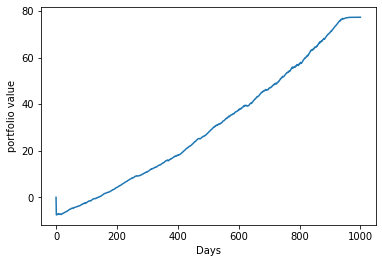

In [5]:
#
# Print a portfolio delta hedge 
#
portfolio = deltahedge(1000, 90, 100, 0.0, 0.3, 0.35, 0.01) # We assume that the implied vol remains higher than is realized
portfolio['portfolio value'].plot()
print(portfolio.head())
plt.xlabel('Days')
plt.ylabel('portfolio value')
plt.show()

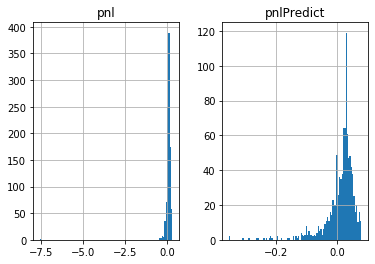

In [6]:
#
# Plot the pnl and the predicted pnl by BSM
#
portfolio.loc[:,['pnlPredict','pnl']].hist(bins = 100)
plt.show()

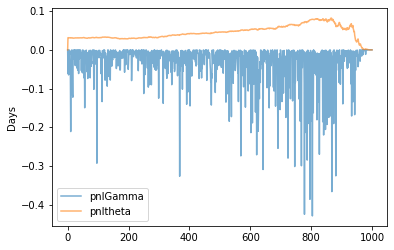

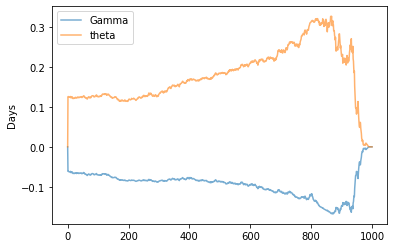

In [7]:
#
# Plot the behaviour of Gamma and theta and their respective PnL over time. 
#
portfolio.loc[:,['pnlGamma','pnltheta']].plot(alpha = 0.6)
plt.ylabel('Days')
portfolio.loc[:,['Gamma','theta']].plot(alpha = 0.6)
plt.ylabel('Days')
plt.show()

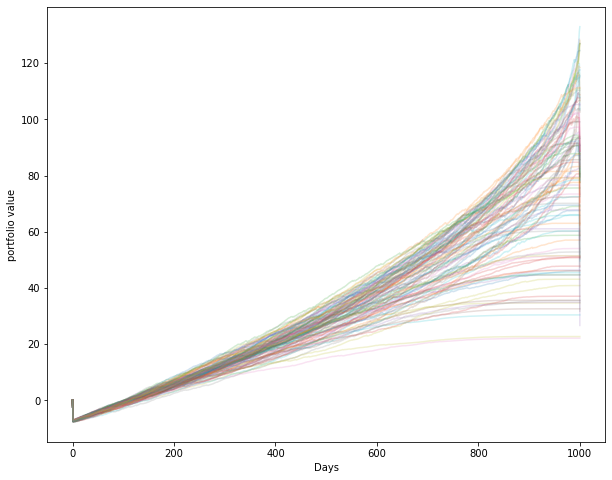

In [8]:
#
# Finally, we estimate 100 posible portfolio paths
#
df = pd.DataFrame()
for portfolio in range(100):
    portfolio = deltahedge(1000, 90, 100, 0.0, 0.3, 0.35, 0.01)
    df = df.append(portfolio['portfolio value'])
df = df.T
plt.figure(figsize = (10,8))
plt.plot(df,alpha = 0.2)
plt.xlabel('Days')
plt.ylabel('portfolio value')
plt.show()

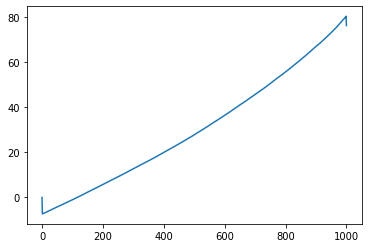

In [9]:
#
# Plot the mean path 
#
mean = df.mean(axis = 1)
mean.plot()
plt.show()